In [12]:
import os
import numpy as np
import pandas as pd
import csv
import sklearn
import matplotlib.pyplot as plt
assert sklearn.__version__ >= "0.20"

In [6]:
from pathlib import Path
from typing import Dict

# Absolute project root for this workspace (adjust if you move the repo)
PROJECT_ROOT = Path("/Users/raoabdul/Documents/Development/Learning-ML/Model Examples and Practice/Practice - Kaggle/house-prices-predictions").resolve()

DATA_DIRS = {
    "kaggle_house_prices": PROJECT_ROOT / "Beginner ML Dev/House Prices",
    "kaggle_spaceship_titanic": PROJECT_ROOT / "Beginner ML Dev/Spaceship Titanic/data",
    "practice_house_prices_predictions": PROJECT_ROOT / "Model Examples and Practice/Practice - Kaggle/house-prices-predictions",
}


def load_csv(relative_path: str, **read_csv_kwargs) -> pd.DataFrame:
    """Load a CSV using a path relative to PROJECT_ROOT.
    Example: "Beginner ML Dev/House Prices/train.csv"
    """
    csv_path = PROJECT_ROOT / relative_path
    return pd.read_csv(csv_path, **read_csv_kwargs)


def load_from_dir(key: str, filename: str, **read_csv_kwargs) -> pd.DataFrame:
    """Load a CSV by directory key defined in DATA_DIRS and filename.
    Example: load_from_dir("kaggle_house_prices", "train.csv")
    """
    base_dir = DATA_DIRS[key]
    return pd.read_csv(base_dir / filename, **read_csv_kwargs)


def list_csvs_in_dir(key: str) -> Dict[str, Path]:
    """List CSV files in a registered data directory, returns {name: path}."""
    base_dir = DATA_DIRS[key]
    return {p.name: p for p in sorted(base_dir.glob("*.csv"))}


def load_all_csvs_in_dir(key: str, **read_csv_kwargs) -> Dict[str, pd.DataFrame]:
    """Load all CSVs in a registered data directory into a dict of DataFrames."""
    files = list_csvs_in_dir(key)
    return {name: pd.read_csv(path, **read_csv_kwargs) for name, path in files.items()}

def load_housing_data(housing_path=PROJECT_ROOT):
          csv_path = os.path.join(housing_path, "data.csv")
          return pd.read_csv(csv_path)

In [9]:
housing = load_housing_data()
housing.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
housing.info()

# No Null properties
# Total of 18 Properties

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [11]:
housing.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


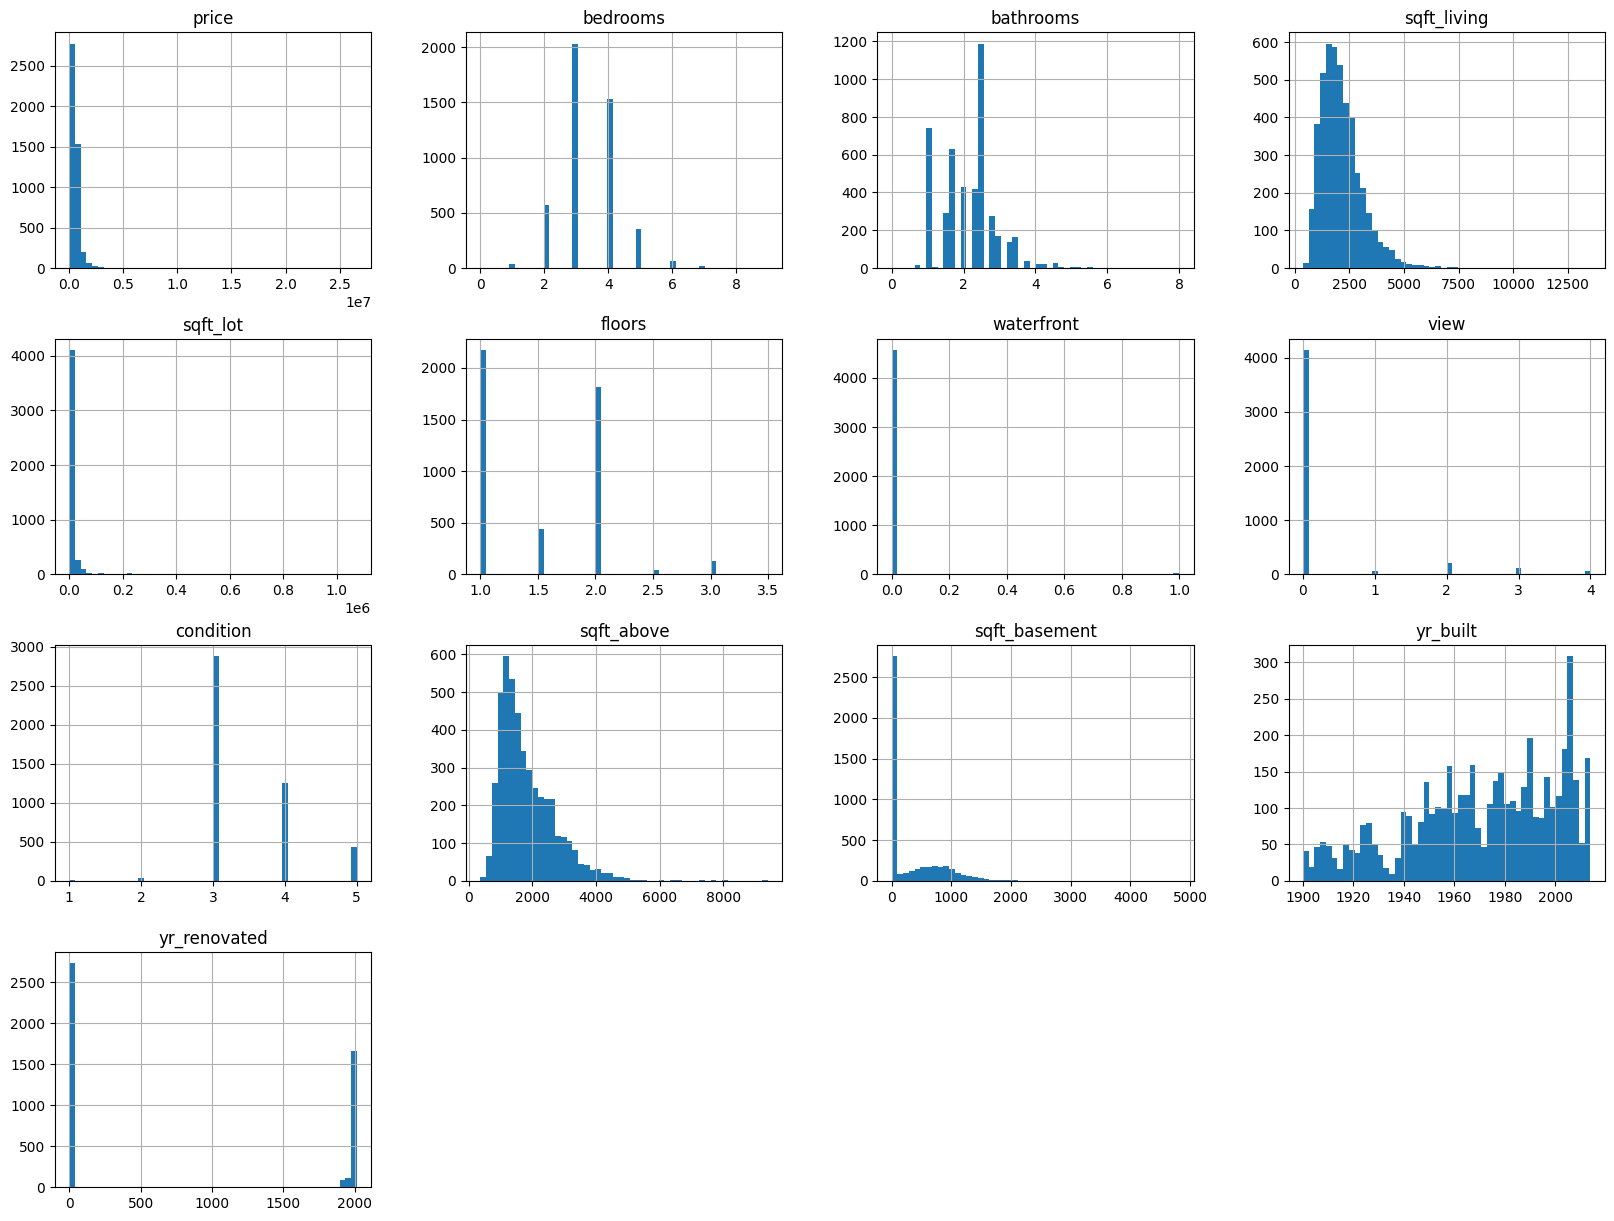

In [19]:
%matplotlib inline
housing.hist(bins=50, figsize=(20, 15))
plt.show()

# **Create Test Set**

In [20]:
from sklearn.model_selection import train_test_split


np.random.seed(42)

def split_train_test(data, test_ratio):
          shuffled_indicies = np.random.permutation(len(data))
          test_set_size = int(len(data) * test_ratio)
          test_indicies = shuffled_indicies[:test_set_size]
          train_indicies = shuffled_indicies[:test_set_size:]
          return data.iloc[train_indicies], data.iloc[test_indicies]

test_set, train_set = train_test_split(housing, 0.2)
len(test_set)

TypeError: Input should have at least 1 dimension i.e. satisfy `len(x.shape) > 0`, got scalar `array(0.2)` instead.